# Plano de Trabalho: Lung Cancer Dataset (Kaggle)

## 1. Compreensão e exploração inicial
- Revisar a documentação e as colunas disponíveis.
- Calcular estatísticas básicas (média, mediana, desvio padrão, percentis).
- Visualizar distribuições das variáveis-chave (histogramas, boxplots).
- Analisar correlações entre variáveis numéricas e com a variável alvo.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
path = '/home/sam/Documents/Doctorado/GA-036/data/Lung Cancer.csv'
#path = Gabi
df = pd.read_csv(path).iloc[:,1:]
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  end_treatment_date  890000 non-null  object 
 15  survived            890000 non-nul

In [30]:
df.describe()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- nao há dados repetidos

In [31]:
df.duplicated().sum()

0

- mudamos o tipo de dado do target de int64 para a category

In [54]:
df['survived'] = df['survived'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['asthma'] = df['asthma'].astype('category')
df['cirrhosis'] = df['cirrhosis'].astype('category')
df['other_cancer'] = df['other_cancer'].astype('category')


- variaveis tipo object para date diagnosis_date, end_treatment_date, e criamos uma nova variavel tempo_de_tratamento

- As variaveis diagnosis_date e end_treatment_date, por elas mesmas só indicam o tempo de inicio e do fim do tratamento 
  mas é mais importante a duracao do tratamento por isso é que criamos a variavel treatment duration

In [33]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'] )
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
time = ((df['end_treatment_date'] - df['diagnosis_date']).dt.days).map(lambda x : int(x))
df.insert(3, 'treatment duration', time)
df['treatment duration'] = pd.to_numeric(df['treatment duration'], errors='coerce')

df.head()

,age,gender,country,treatment duration,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,523,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,424,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,370,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,443,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,406,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


- Removemos as variaveis diagnosis_date e end_treatment_date

In [34]:
df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)
df.head()

,age,gender,country,treatment duration,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,Male,Sweden,523,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50.0,Female,Netherlands,424,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65.0,Female,Hungary,370,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51.0,Female,Belgium,443,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37.0,Male,Luxembourg,406,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0


- A variavel country so representa uma quantidade de pessoas mas como nao existe outra variavel relacionada tipo qualidade
  de vida para representar melhor a informacao de country vamos observar como é a distribuicao com relacao ao target 

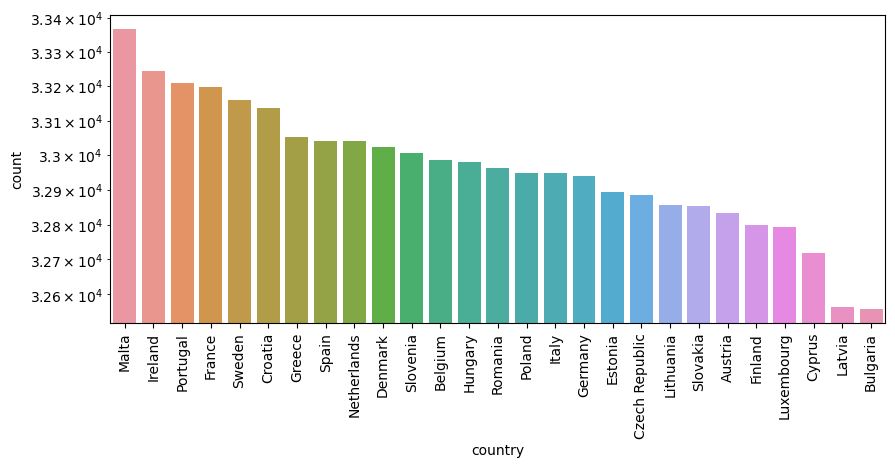

In [35]:
plt.figure(figsize=(10,4))
order = df['country'].value_counts().index
sns.countplot(x='country', data=df,order=order)
plt.yscale("log")
plt.xticks(rotation=90) 
plt.show()

-insight 1 : pode ser que variaveis geograficas sejam condicionantes para aumentar o numero de casos de
        cancer de pulmao mas essa informacao nao esta presente no dataset

/tmp/ipykernel_10957/3229905768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['country', 'survived']).size().unstack()


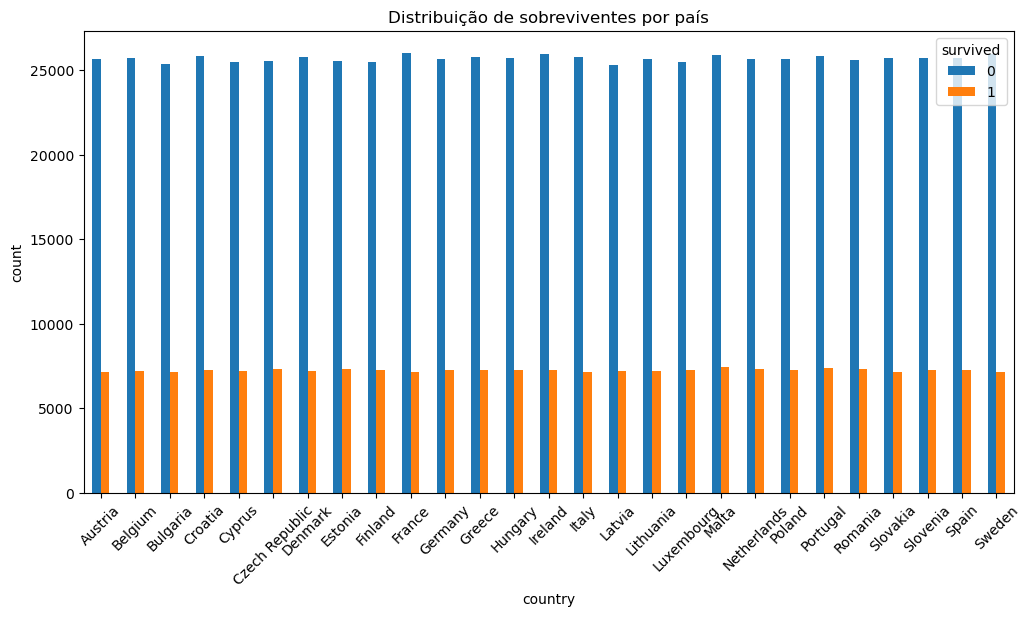

In [36]:
dist = df.groupby(['country', 'survived']).size().unstack()
dist.plot(kind='bar', figsize=(12,6))
plt.title("Distribuição de sobreviventes por país")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()

- Observamos que em cada pais o nivel de desbalco da variabel alvo é parecido 

/tmp/ipykernel_10957/2807107110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['country', 'survived'])['age'].mean().unstack()


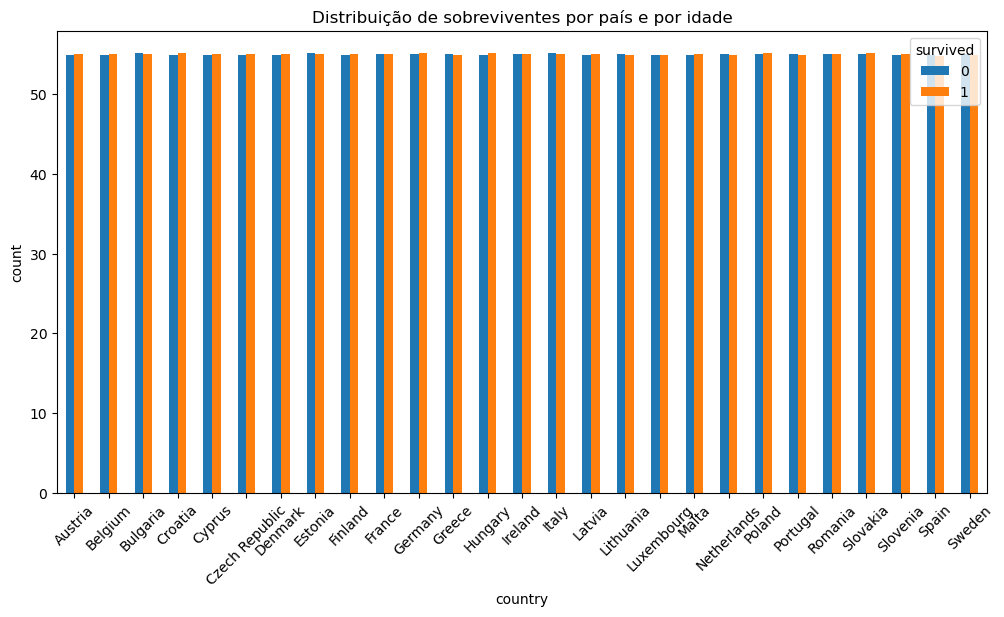

In [37]:
dist = df.groupby(['country', 'survived'])['age'].mean().unstack()
dist.plot(kind='bar', figsize=(12,6))
plt.title("Distribuição de sobreviventes por país e por idade")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()

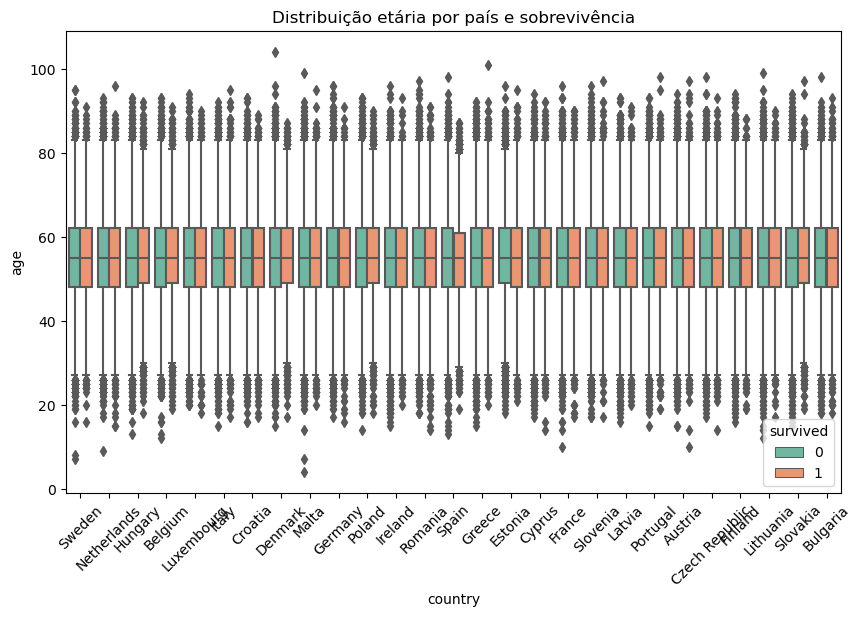

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="country", y="age", hue="survived", palette="Set2")
plt.title("Distribuição etária por país e sobrevivência")
plt.xticks(rotation=45)
plt.show()

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


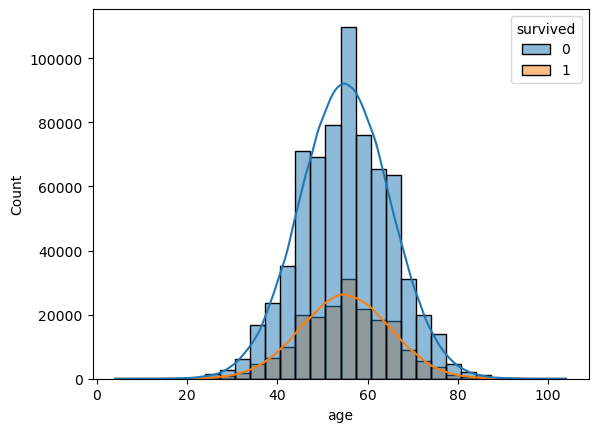

In [39]:
sns.histplot(data=df, x="age",hue='survived', bins=30, kde=True)
plt.show()

- Removemos a variavel country

In [40]:
df.drop(['country'], axis=1, inplace=True)
df.head()

,age,gender,treatment duration,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,Male,523,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50.0,Female,424,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65.0,Female,370,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51.0,Female,443,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37.0,Male,406,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0


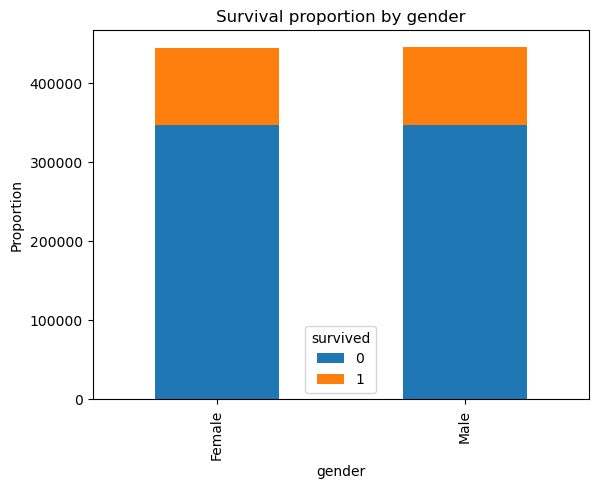

In [41]:
ct = pd.crosstab(df['gender'], df['survived'])
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by gender")
plt.ylabel("Proportion")
plt.show()

- observamos a dist de o tempo de tratamento 

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


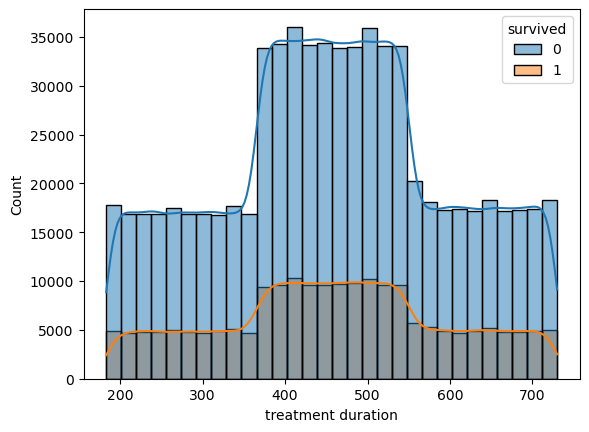

In [42]:
sns.histplot(data=df, x="treatment duration",hue='survived', bins=30, kde=True)
plt.show()

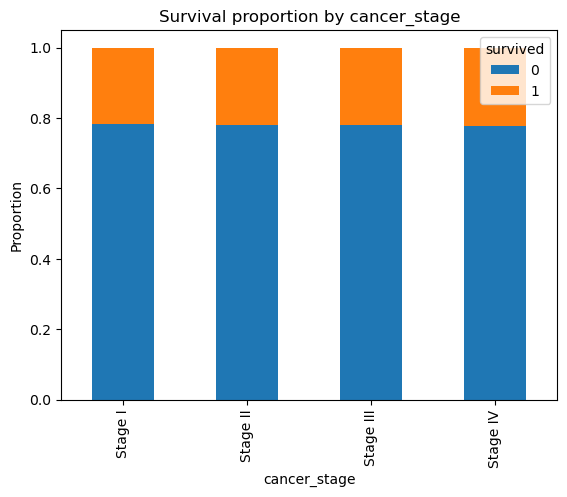

In [43]:
ct = pd.crosstab(df['cancer_stage'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by cancer_stage")
plt.ylabel("Proportion")
plt.show()

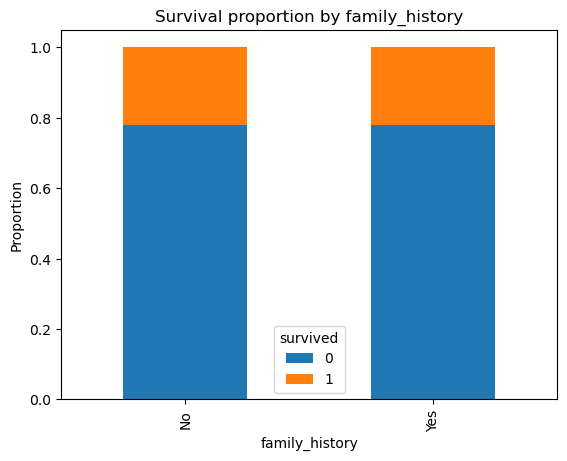

In [44]:
ct = pd.crosstab(df['family_history'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by family_history")
plt.ylabel("Proportion")
plt.show()

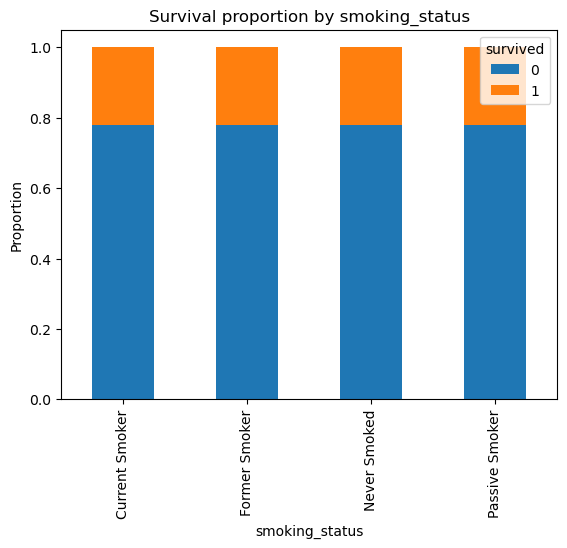

In [45]:
ct = pd.crosstab(df['smoking_status'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by smoking_status")
plt.ylabel("Proportion")
plt.show()

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


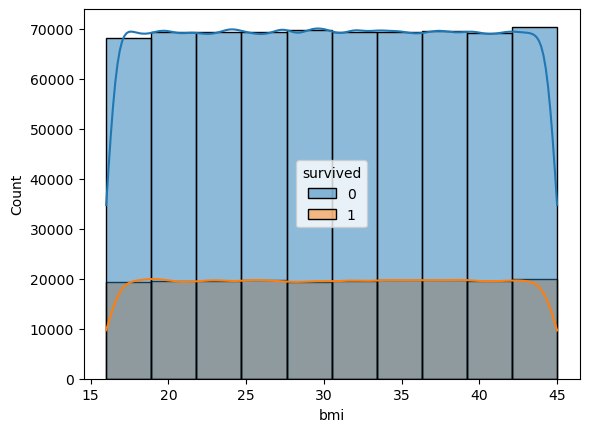

In [46]:
sns.histplot(data=df, x="bmi",hue='survived', bins=10, kde=True)
plt.show()

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


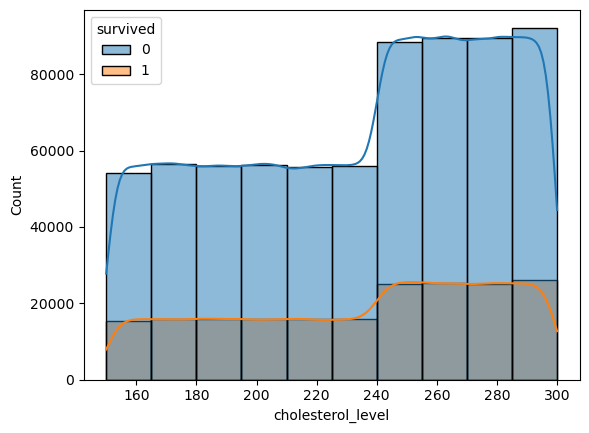

In [47]:
sns.histplot(data=df, x="cholesterol_level",hue='survived', bins=10, kde=True)
plt.show()

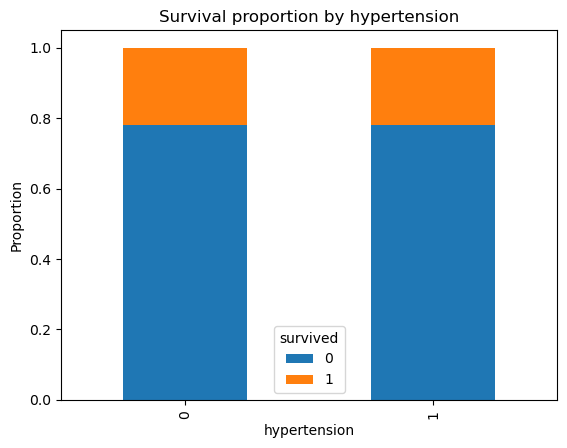

In [48]:
ct = pd.crosstab(df['hypertension'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by hypertension")
plt.ylabel("Proportion")
plt.show()

In [56]:
df_numeric = df.select_dtypes(include="number").columns
df_numeric


Index(['age', 'treatment duration', 'bmi', 'cholesterol_level'], dtype='object')

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=

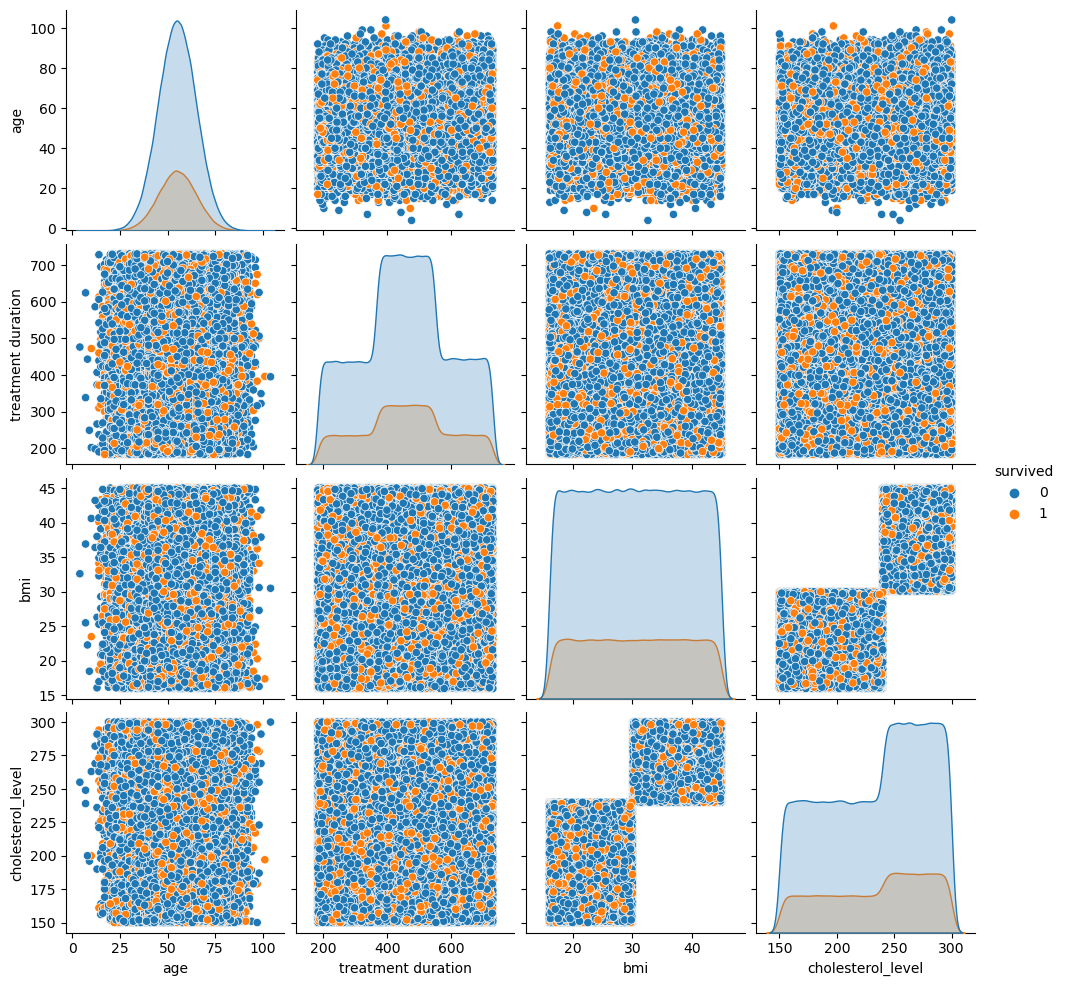

In [57]:
sns.pairplot(df,vars=df_numeric,hue='survived')

In [58]:
from sklearn.feature_selection import mutual_info_classif

In [60]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Codificar categóricas
X_enc = pd.get_dummies(X, drop_first=True)

# Calcular información mutua
mi = mutual_info_classif(X_enc, y, discrete_features='auto')
mi_scores = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)
print(mi_scores)

hypertension_1                   0.122458
gender_Male                      0.091589
family_history_Yes               0.090951
asthma_1                         0.082287
smoking_status_Former Smoker     0.025214
treatment_type_Surgery           0.024550
cancer_stage_Stage IV            0.024440
smoking_status_Never Smoked      0.024387
smoking_status_Passive Smoker    0.023972
cancer_stage_Stage II            0.023945
treatment_type_Radiation         0.023900
cancer_stage_Stage III           0.023892
treatment_type_Combined          0.023591
cirrhosis_1                      0.020604
age                              0.004114
other_cancer_1                   0.003551
treatment duration               0.000694
cholesterol_level                0.000577
bmi                              0.000100
dtype: float64



## 2. Pré-processamento de dados
- **Limpeza de dados**:
  - Imputar valores ausentes conforme o tipo de variável.
  - Detectar e tratar valores atípicos.
- **Codificação de variáveis categóricas**:
  - Ordinal encoding, se aplicável.
  - One-hot encoding para variáveis sem ordem.
- **Normalização ou padronização**:
  - Z-score ou min-max scaling conforme o modelo.
- **Engenharia de atributos**:
  - Criar variáveis derivadas (ex.: idade em faixas).
  - Reduzir dimensionalidade se necessário.


## 3. Análise exploratória aprofundada
- Analisar relações entre variáveis e a variável alvo.
- Usar gráficos avançados (gráficos de violino, barras empilhadas, heatmaps, pairplots).
- Detectar viés ou desbalanceamento de classes.


## 4. Modelagem preditiva
- **Definir o problema**:
  - Classificação (mortalidade sim/não) ou regressão (tempo de sobrevivência).
- **Divisão dos dados**:
  - Train/test e validação cruzada (k-fold CV).
- **Modelos a testar**:
  - Regressão logística, árvores de decisão, random forest, gradient boosting (XGBoost, LightGBM), SVM, redes neurais.
- **Ajuste de hiperparâmetros**:
  - Grid Search ou Random Search com CV.
- **Avaliação de desempenho**:
  - Métricas de classificação: acurácia, precisão, recall, F1, AUC-ROC.
  - Métricas de regressão: RMSE, MAE, R².


## 5. Interpretação e explicabilidade
- Obter importância das variáveis (coeficientes, SHAP, LIME).
- Analisar curvas ROC e limiares de decisão.
- Documentar padrões relevantes encontrados.


## 6. Validação final e robustez
- Avaliar no conjunto de teste independente.
- Analisar erros (falsos positivos/negativos).
- Comparar desempenho entre treino e teste para detectar overfitting.


## 7. Apresentação e relatório final
- Incluir visualizações-chave (barras, heatmaps, importância de variáveis, curvas ROC).
- Resumir o fluxo de trabalho e os principais achados.
- Apresentar conclusões e recomendações.
- Sugerir melhorias futuras e possíveis novas variáveis a serem coletadas.

nao existe dados nulos nas colunas porem nao ha necessidade de fazer imputacao dos dados
